In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from cycler import cycler
from pathlib import Path

In [2]:
# matplotlib.rcParams.update(matplotlib.rcParamsDefault)

nicer_green = '#159C48'
nicer_blue = '#00A0FF'
orange = '#FBBC04'

plt.rcParams['figure.figsize'] = [5, 4]
plt.rcParams["axes.prop_cycle"] = cycler('color', [nicer_blue, nicer_green, orange])
plt.rcParams['lines.linewidth'] = 0.5

In [15]:
HISTORY_DIR = Path('../results/tuning/')
# filenames = (
#     '3_4W_imu_2024-05-28-19-05-17',
#     '3_6W_imu_2024-05-28-20-40-28',
#     '3_4W_6W_imu_2024-05-28-18-34-16',
#     '3_4W_servo_2024-06-03-16-30-49',
#     '3_6W_servo_2024-06-03-17-12-39',
#     '3_4W_6W_servo_2024-06-03-18-31-33',
#     '3_4W_imu_servo_2024-05-28-19-35-07',
#     '3_6W_imu_servo_2024-05-28-20-10-03',
#     '3_4W_6W_imu_servo_2024-05-28-11-54-14',
# )

# filenames = (
#     '10_4W_imu_2024-05-13-09-24-10',
#     '10_6W_imu_2024-05-13-10-35-45',
#     '10_4W_6W_imu_2024-05-13-08-18-11',
#     '10_4W_servo_2024-06-03-21-51-29',
#     '10_6W_servo_2024-06-03-22-29-57',
#     '10_4W_6W_servo_2024-06-03-21-21-22',
#     '10_4W_imu_servo_2024-05-13-08-53-16',
#     '10_6W_imu_servo_2024-05-13-09-58-30',
#     '10_4W_6W_imu_servo_2024-05-13-01-30-56',
# )

# filenames = (
#     'xgb_3_4W_imu_2024-06-07-18-12-13',
#     'xgb_3_6W_imu_2024-06-07-18-16-43',
#     'xgb_3_4W_6W_imu_2024-06-07-18-23-51',
#     'xgb_3_4W_servo_2024-06-07-18-27-19',
#     'xgb_3_6W_servo_2024-06-07-18-30-21',
#     'xgb_3_4W_6W_servo_2024-06-07-18-36-03',
#     'xgb_3_4W_imu_servo_2024-06-07-18-41-55',
#     'xgb_3_6W_imu_servo_2024-06-07-18-47-03',
#     'xgb_3_4W_6W_imu_servo_2024-06-07-18-55-42',
# )

filenames = (
    'xgb_10_4W_imu_2024-06-06-23-47-53',
    'xgb_10_6W_imu_2024-06-06-23-54-59',
    'xgb_10_4W_6W_imu_2024-06-07-00-07-27',
    'xgb_10_4W_servo_2024-06-07-00-12-10',
    'xgb_10_6W_servo_2024-06-07-00-16-36',
    'xgb_10_4W_6W_servo_2024-06-07-00-25-17',
    'xgb_10_4W_imu_servo_2024-06-07-00-34-13',
    'xgb_10_6W_imu_servo_2024-06-07-00-56-16',
    'xgb_10_4W_6W_imu_servo_2024-06-07-01-20-21',
)

labels = ('IMU', 'POWER', 'IMU + POWER')

t_95 = 2.228

In [16]:
results = {}
for filename in filenames:
    with open(HISTORY_DIR / (filename + '.json')) as fp:
        results[filename] = json.load(fp)

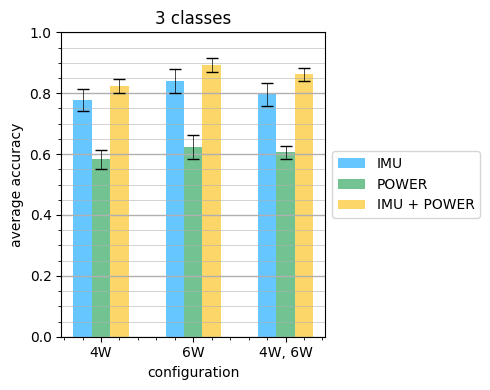

In [17]:
fig, ax = plt.subplots()

average_acc, ci_acc = [], []
for result in results.values():
    df = pd.DataFrame(result)
    res_array = np.array(df.loc['accuracy'].values.tolist()).T
    average_acc.append(res_array.mean())
    ci_acc.append(t_95 * res_array.std() / np.sqrt(10))

i = 0
ind = np.arange(len(average_acc) / len(labels)) # the x locations for the groups
ind_copy = ind.copy()
width = 0.2 # the width of the bars
for label in labels:
    ax.bar(ind, average_acc[i:i+3], width, yerr=ci_acc[i:i+3], label=label, capsize=4, alpha=0.6)
    i += 3
    ind += width

ax.set_xticks(ind_copy + width, labels=['4W', '6W', '4W, 6W'])
ax.set_ylim(0, 1)
ax.set_xlabel('configuration')
ax.set_ylabel('average accuracy')
ax.set_title('3 classes')
plt.grid(which='major', axis='y', linewidth=1)
plt.grid(which='minor', axis='y', linewidth=0.4)
plt.minorticks_on()
plt.legend(bbox_to_anchor=(1, 0.5), loc='center left',)
fig.tight_layout()
# plt.savefig(f'../results/tuning/10_4w_6w_300dpi.png', dpi=300)
# plt.close()

In [18]:
fig, ax = plt.subplots()

average_f1, ci_f1 = [], []
for result in results.values():
    df = pd.DataFrame(result)
    res_array = np.array(df.loc['f1_score'].values.tolist()).T
    average_f1.append(res_array.mean())
    ci_f1.append(t_95 * res_array.std() / np.sqrt(10))
    
i = 0
ind = np.arange(len(average_f1) / len(labels)) # the x locations for the groups
width = 0.2 # the width of the bars
for label in labels:
    ax.bar(ind, average_f1[i:i+3], width, yerr=ci_f1[i:i+3], label=label, capsize=4, alpha=0.6)
    i += 3
    ind += width

ax.set_xticks(ind_copy + width, labels=['4W', '6W', '4W, 6W'])
ax.set_ylim(0.4, 1)
ax.set_xlabel('configuration')
ax.set_ylabel('average F1 score')
# ax.set_title('3 classes')
plt.grid(which='major', axis='y', linewidth=1)
plt.grid(which='minor', axis='y', linewidth=0.4)
plt.minorticks_on()
plt.legend(bbox_to_anchor=(1, 0.5), loc='center left',)
fig.tight_layout()
plt.savefig(f'../results/tuning/xgb_10_300dpi.png', dpi=300)
plt.close()